## Study A analyses

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.realpath("./"))) # Add parent to path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from scipy.stats import linregress
from plots import bars, plot_linreg

In [2]:
plt.style.use("jg.mplstyle")

In [3]:
df_trials = pd.read_pickle('./frames/df_trials.pickle')
df_subjs = pd.read_pickle('./frames/df_subjs.pickle')
df_anovas = pd.read_pickle('./frames/df_anovas.pickle')

In [4]:
df = df_trials[df_trials.map_kind == "random"]
df_subjs = df_subjs[df_subjs.map_kind == "random"]

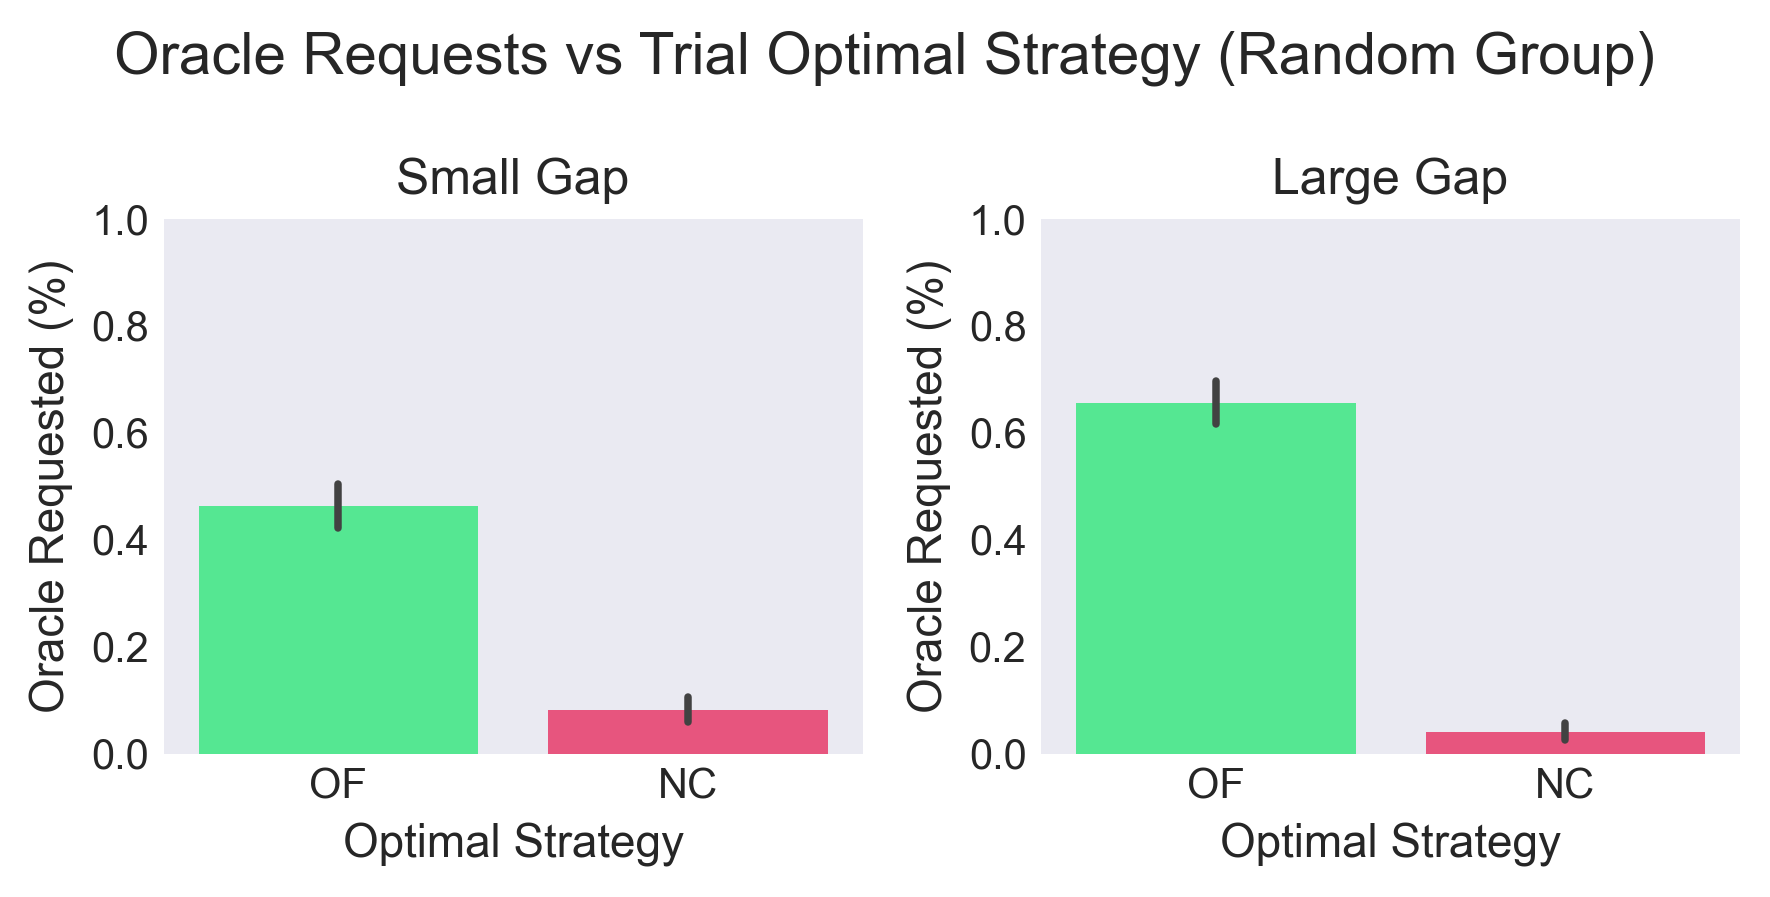

In [5]:
bars(x='cond_best_strat', y='oracle_requested', df=df, hue=None, 
     figure_attr="cond_gap_size", figure_vals=["S", "L"], figsize=(6, 3), figure_labels=["Small Gap", "Large Gap"],
    palette=["#3dff8e", "#ff3d74"], xlabel="Optimal Strategy", xticklabels=["OF", "NC"],
     ylabel="Oracle Requested (%)", suptitle="Oracle Requests vs Trial Optimal Strategy (Random Group)", 
     save="oracle_strat_gap_size")            

r=0.78 p=0.000


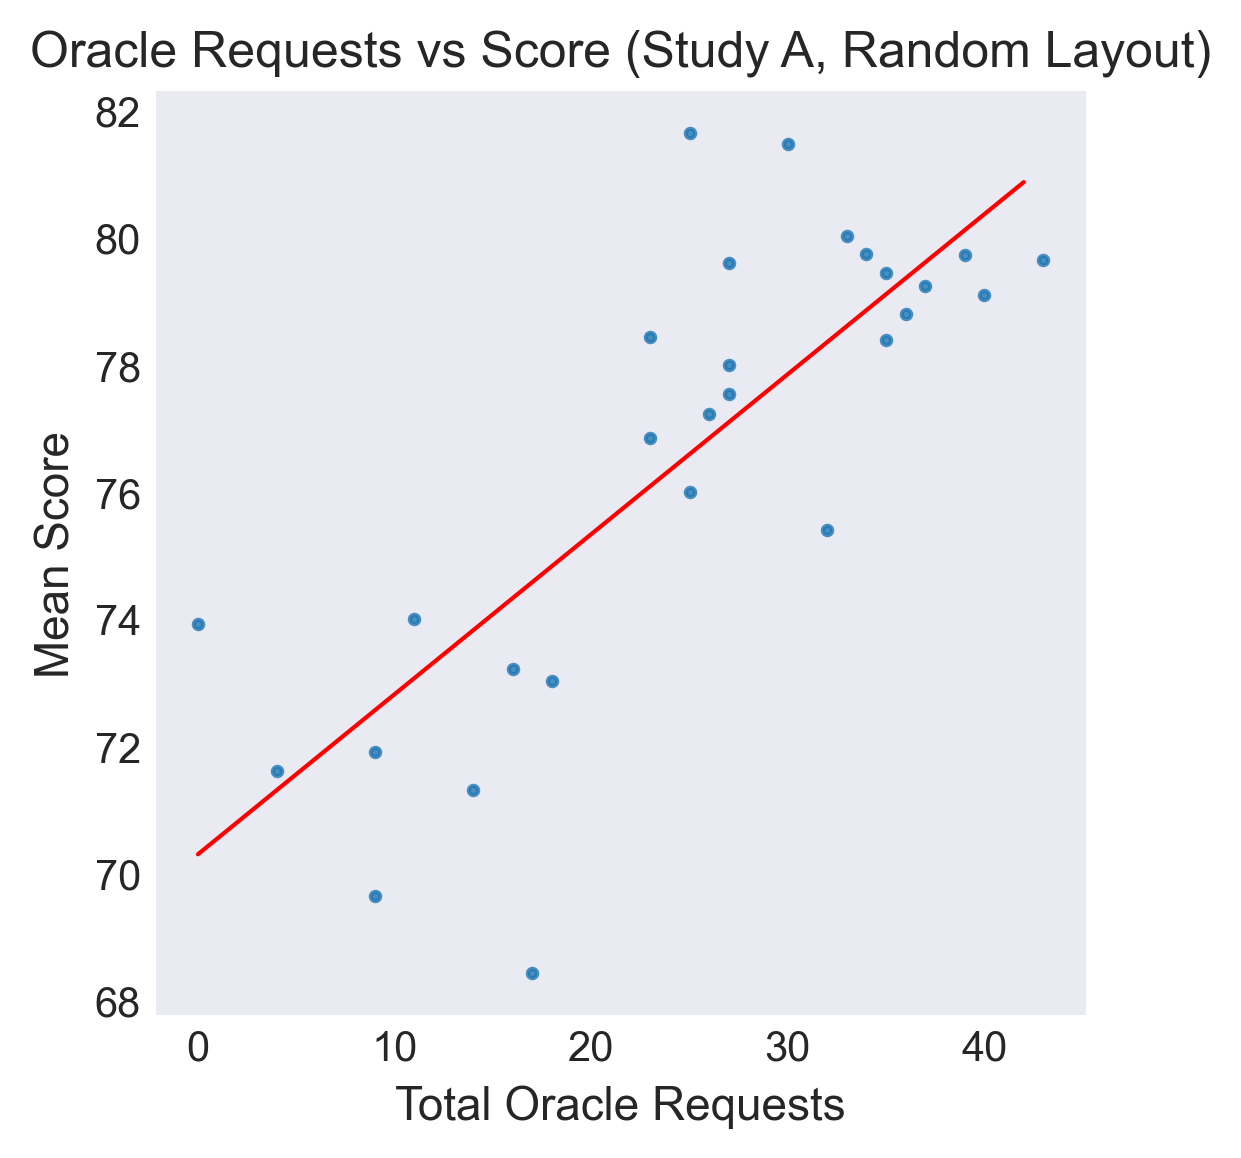

In [6]:
fig, ax = plt.subplots(dpi=300, figsize=(4, 4))
X = df.groupby('match_id').oracle_requested.sum().values
Y = df.groupby('match_id').score.mean().values
yerr = df.groupby('match_id').score.std().values
ax.scatter(X, Y, alpha=0.8, s=5.)
# ax.errorbar(X, Y, yerr=yerr, capsize=3)
ax.set_xlabel("Total Oracle Requests")
ax.set_ylabel("Mean Score")
ax.set_title("Oracle Requests vs Score (Study A, Random Layout)")
plot_linreg(X, Y, ax, text_xpct=0.5, text_yoffset=1, show_text=False)
plt.savefig("./figures/oracle_req_score_scatter_random.png", bbox_inches=0)
plt.show()

In [11]:
df_subjs.columns

Index(['user_id', 'match_id', 'map_kind', 'ius_score', 'total_score',
       'total_score_s', 'total_score_l', 'total_score_of', 'total_score_no',
       'total_oracle_requests', 'total_oracle_requests_s',
       'total_oracle_requests_l', 'total_oracle_requests_of',
       'total_oracle_requests_no', 'total_correct_strat'],
      dtype='object')

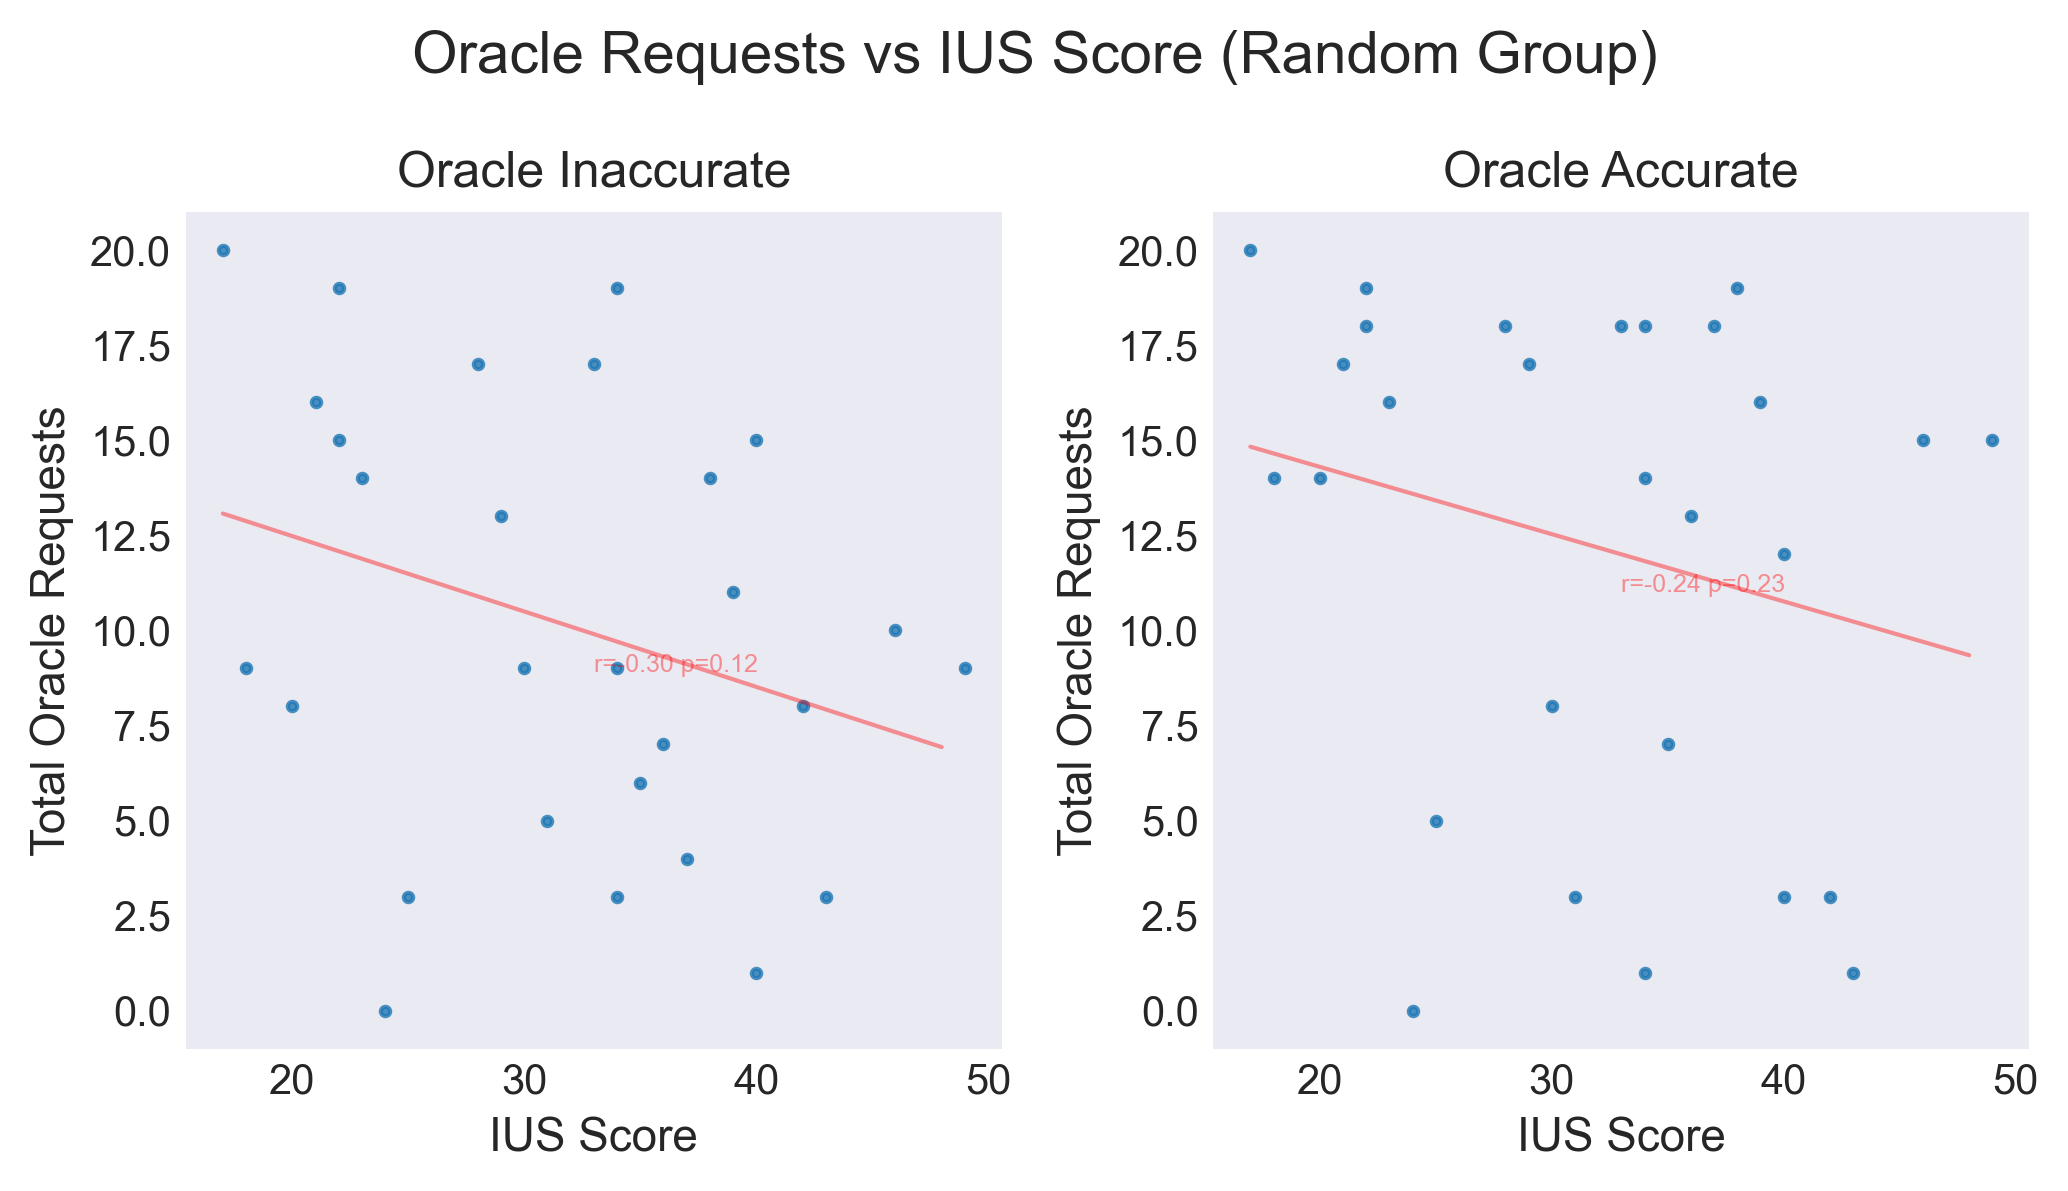

In [17]:
for key, subj in df_subjs.iterrows():
    total_acc = 0
    total_inacc = 0
    for trial_key, trial in df_trials[(df_trials.match_id == subj.match_id) & (df_trials.cond_best_strat == "OF")].iterrows():
        if trial.cond_oracle_acc == "A":
            total_acc += trial.oracle_requested
        else:
            total_inacc += trial.oracle_requested
    df_subjs.loc[key, 'total_oracle_requests_acc'] = total_acc
    df_subjs.loc[key, 'total_oracle_requests_inacc'] = total_inacc    
        
fig, axs = plt.subplots(1, 2, dpi=300, figsize=(7, 4))

ax = axs[0]
X = df_subjs.ius_score
Y = df_subjs.total_oracle_requests_inacc
ax.scatter(X, Y, alpha=0.8, s=5.)
# ax.errorbar(X, Y, yerr=yerr, capsize=3)
ax.set_xlabel("IUS Score")
ax.set_ylabel("Total Oracle Requests")
ax.set_title("Oracle Inaccurate")
plot_linreg(X, Y, ax, text_xpct=0.5, text_yoffset=1)

ax = axs[1]
X = df_subjs.ius_score
Y = df_subjs.total_oracle_requests_acc
ax.scatter(X, Y, alpha=0.8, s=5.)
# ax.errorbar(X, Y, yerr=yerr, capsize=3)
ax.set_xlabel("IUS Score")
ax.set_ylabel("Total Oracle Requests")
ax.set_title("Oracle Accurate")
plot_linreg(X, Y, ax, text_xpct=0.5, text_yoffset=1)

plt.suptitle("Oracle Requests vs IUS Score (Random Group)")

plt.tight_layout()
# plt.savefig("./figures/oracle_req_score_scatter_random.png", bbox_inches=0)
plt.show()

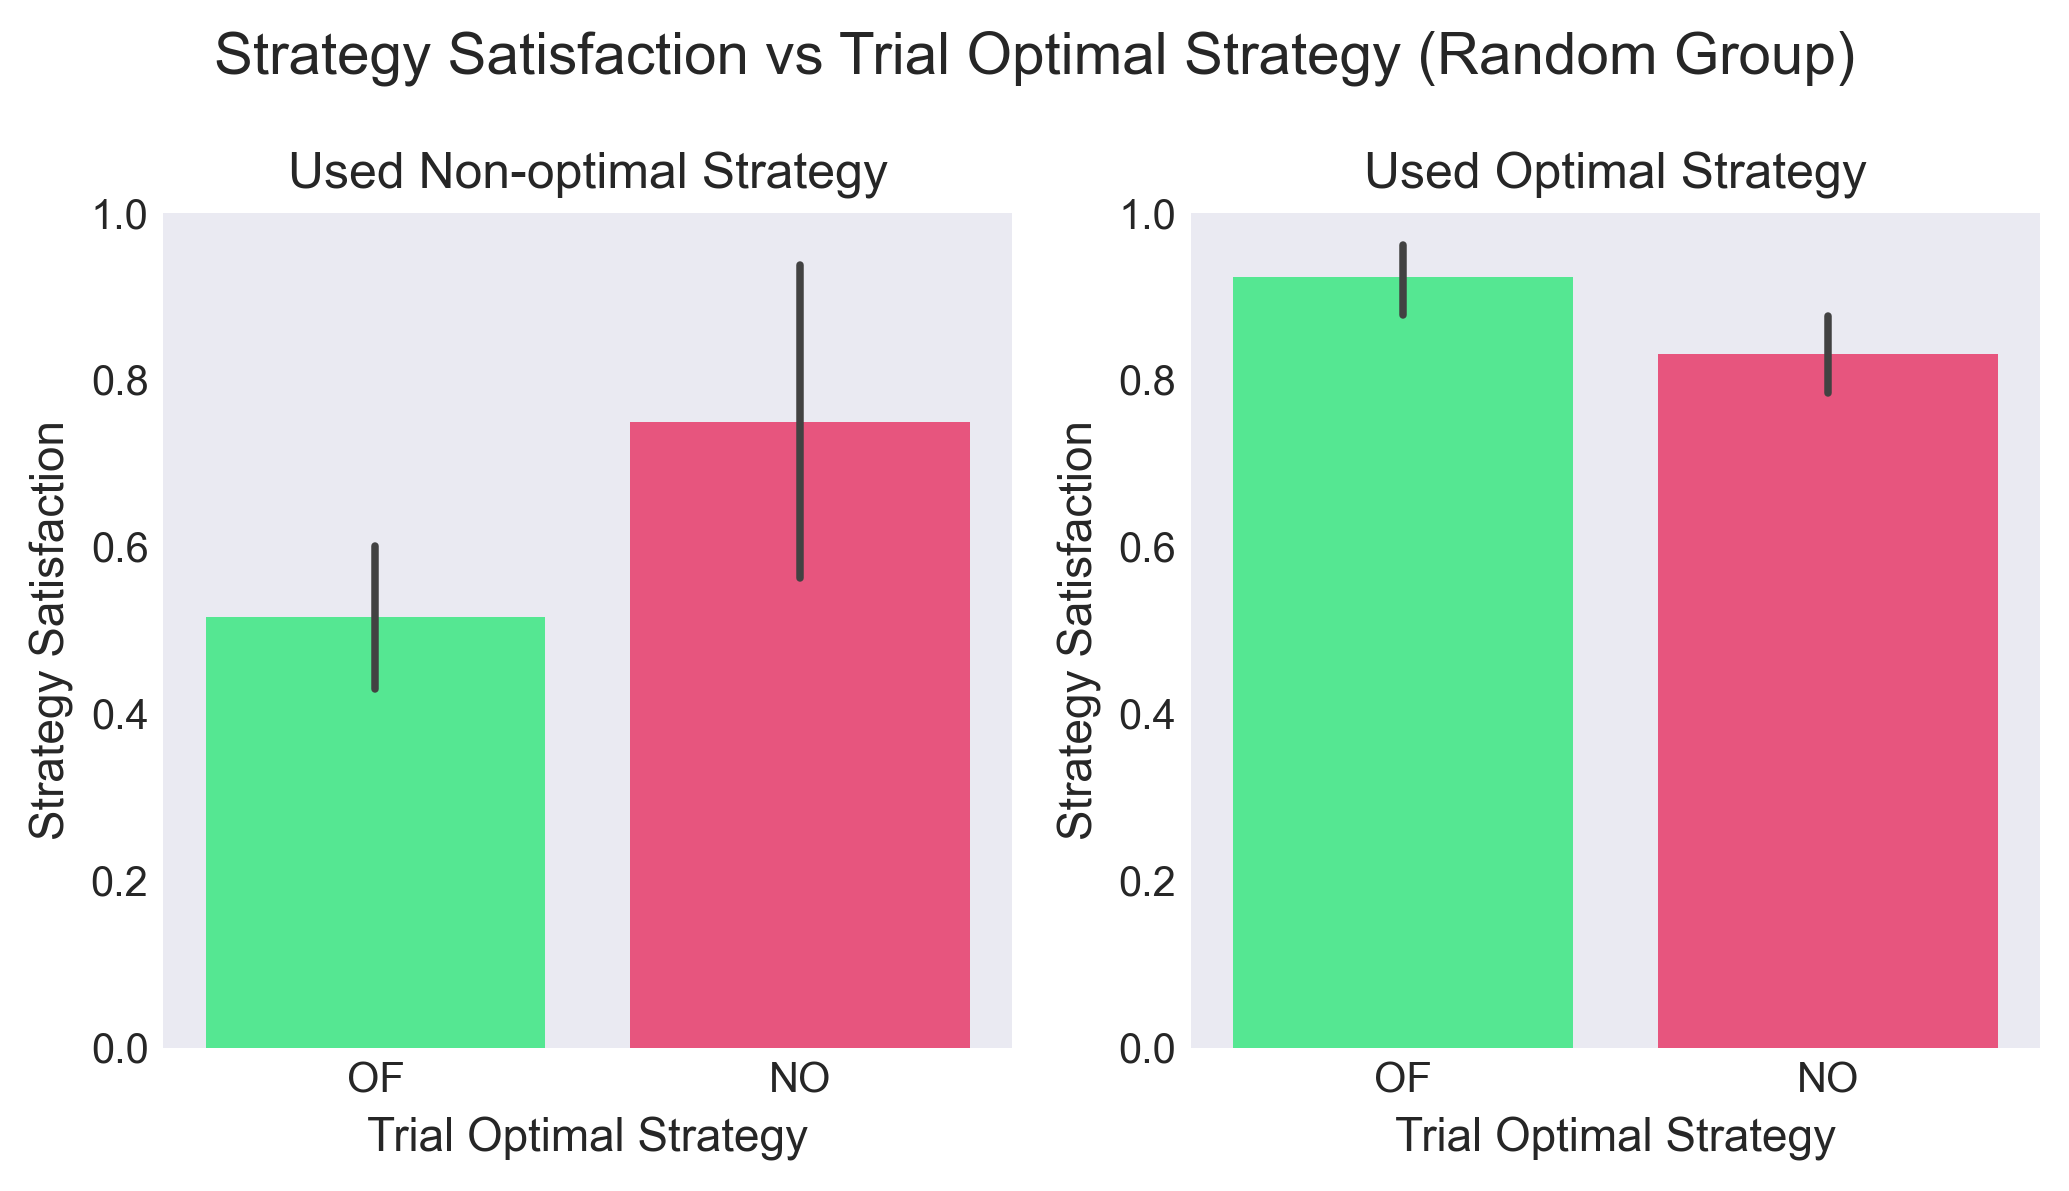

In [7]:
bars(x='cond_best_strat', y='retry_response', df=df[df.retry_response > -1], hue=None, 
     figure_attr="correct_strat", figure_vals=[0, 1], figsize=(7, 4), figure_labels=["Used Non-optimal Strategy", "Used Optimal Strategy"],
    palette=["#3dff8e", "#ff3d74"], xlabel="Trial Optimal Strategy", ylabel="Strategy Satisfaction", suptitle="Strategy Satisfaction vs Trial Optimal Strategy (Random Group)", 
     save="choice_satisfaction_optimal_strat")            

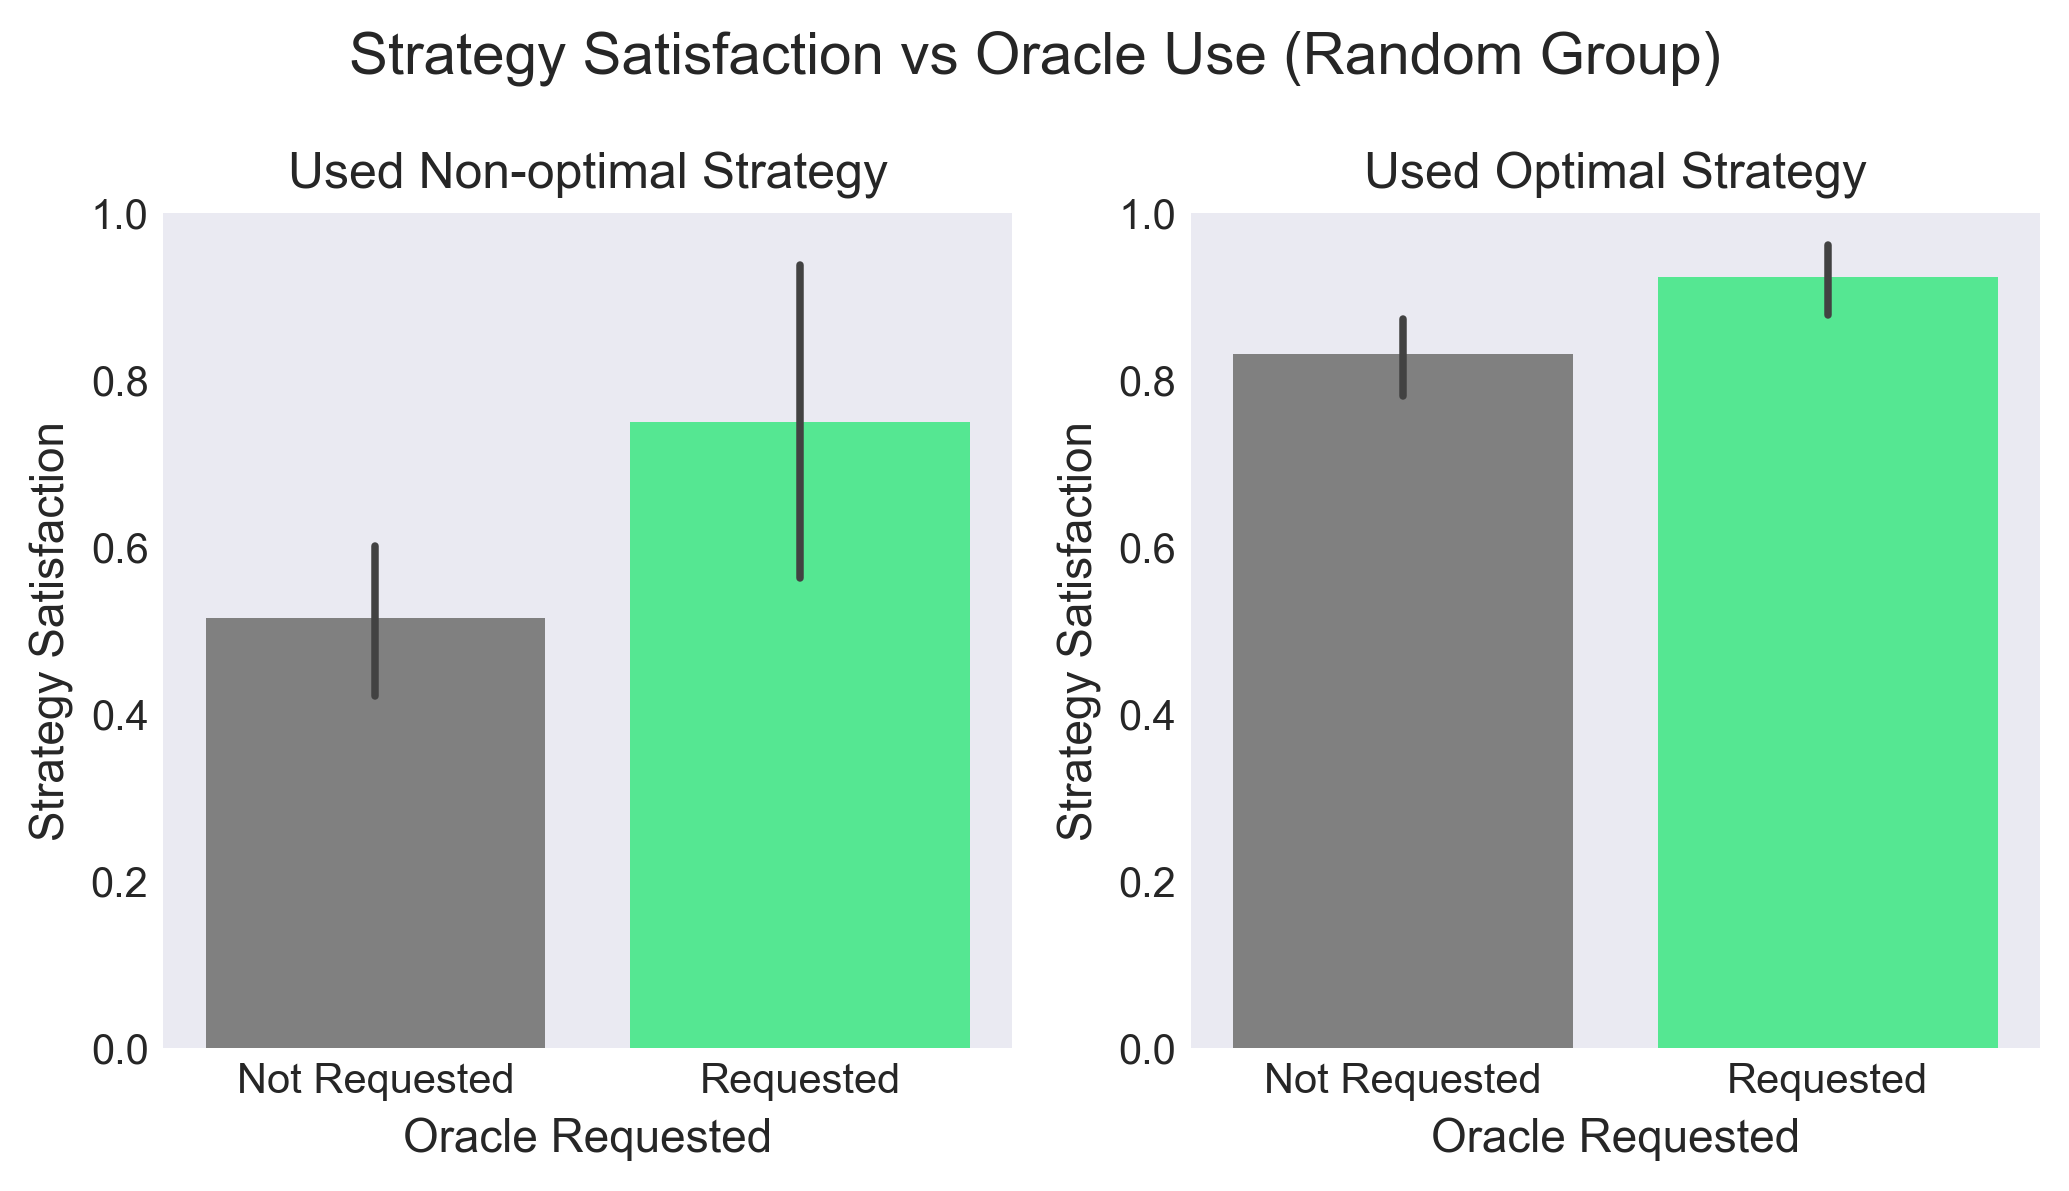

In [9]:
bars(x='oracle_requested', y='retry_response', df=df[df.retry_response > -1], hue=None, 
     figure_attr="correct_strat", figure_vals=[0, 1], figsize=(7, 4), figure_labels=["Used Non-optimal Strategy", "Used Optimal Strategy"],
    palette=["gray", "#3dff8e"], xlabel="Oracle Requested", ylabel="Strategy Satisfaction", suptitle="Strategy Satisfaction vs Oracle Use (Random Group)", 
     xticklabels=["Not Requested", "Requested"],
     save="choice_satisfaction_oracle_req")            

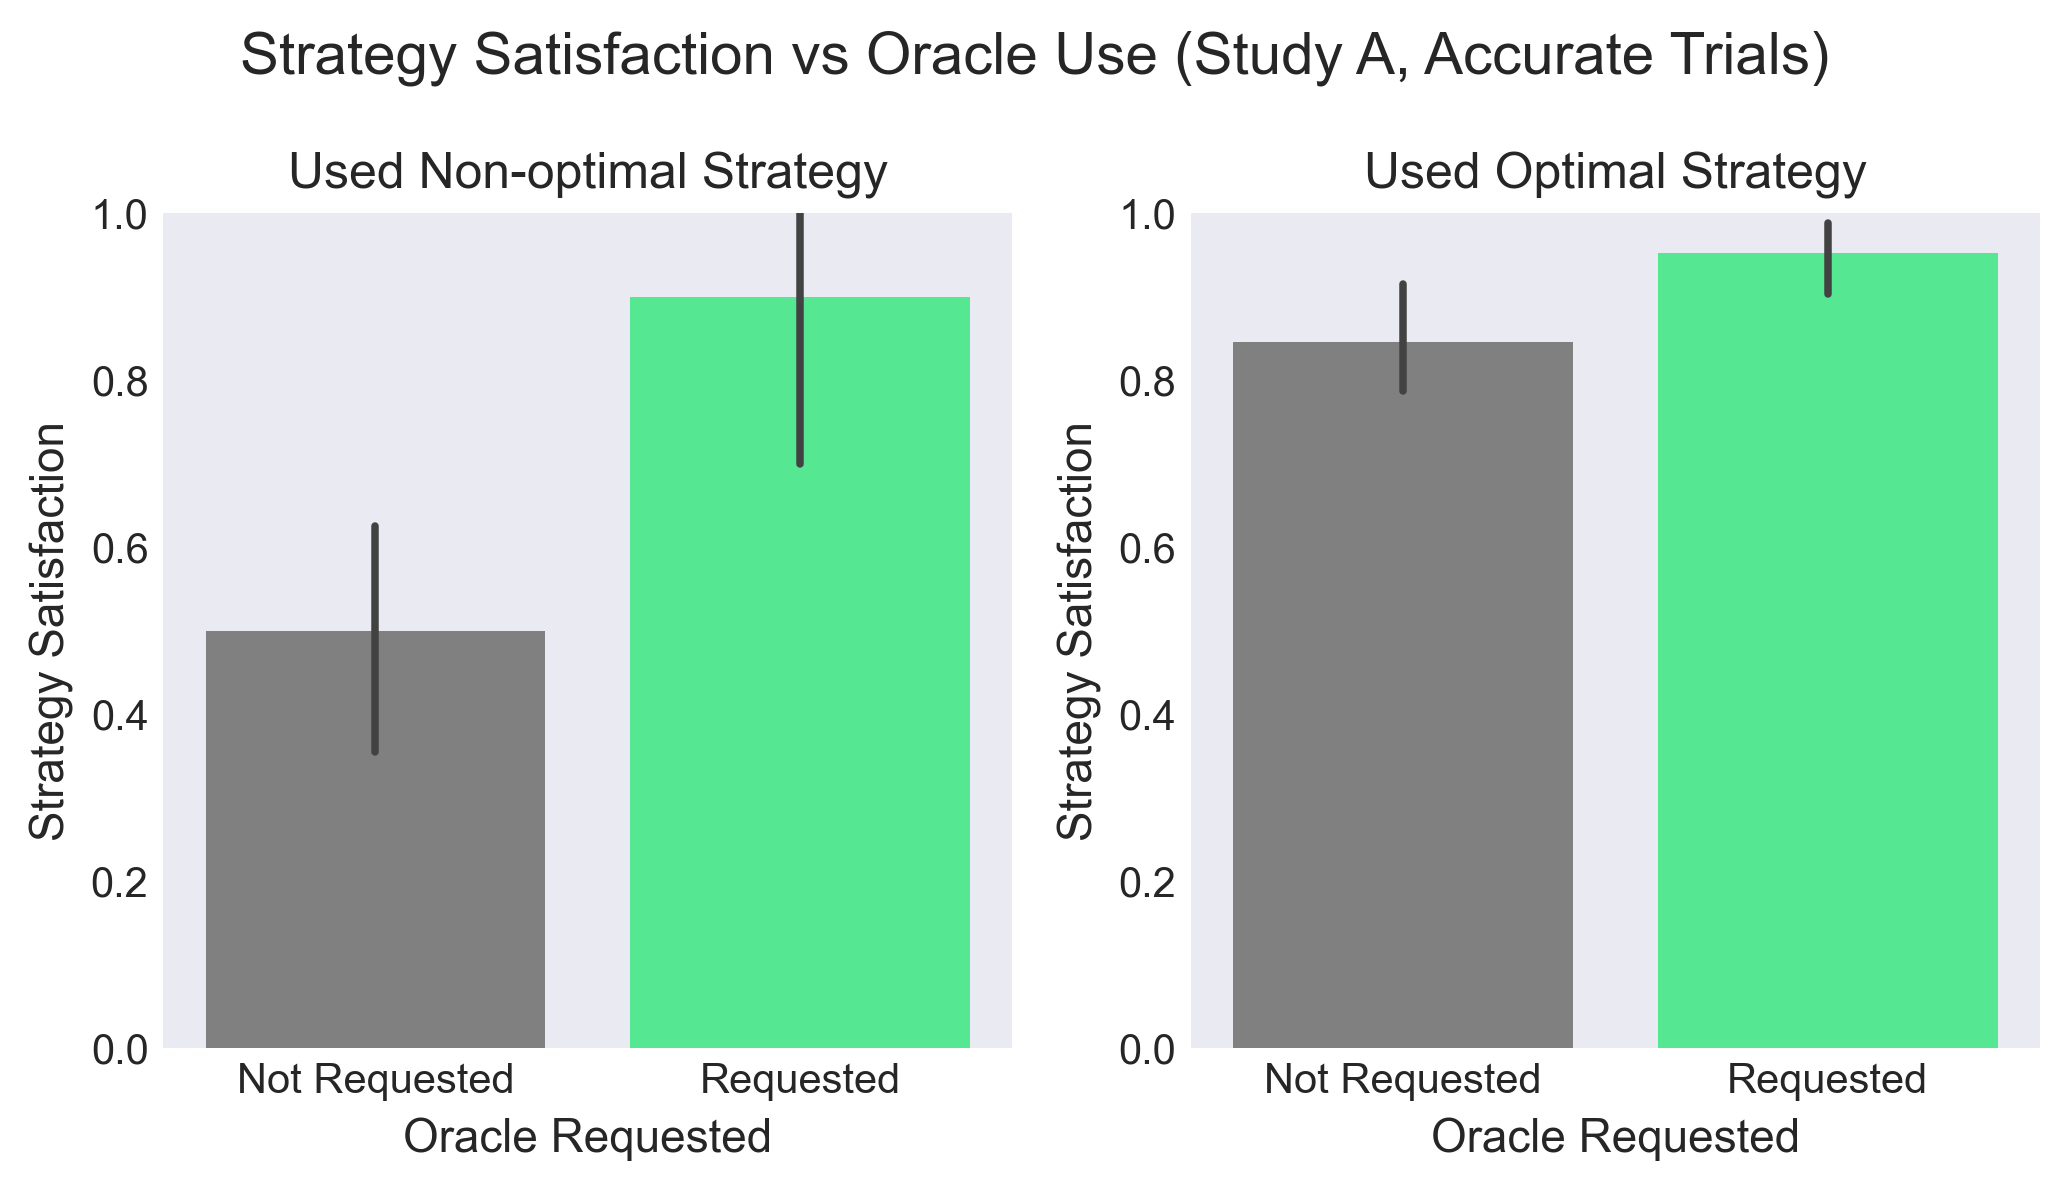

In [12]:
df_acc = df[(df.cond_oracle_acc == 'A') & (df.retry_response > -1)]
bars(x='oracle_requested', y='retry_response', df=df_acc, hue=None, 
     figure_attr="correct_strat", figure_vals=[0, 1], figsize=(7, 4), figure_labels=["Used Non-optimal Strategy", "Used Optimal Strategy"],
    palette=["gray", "#3dff8e"], xlabel="Oracle Requested", ylabel="Strategy Satisfaction", suptitle="Strategy Satisfaction vs Oracle Use (Study A, Accurate Trials)", 
     xticklabels=["Not Requested", "Requested"],
     save="choice_satisfaction_oracle_req")            

<AxesSubplot: xlabel='cond_oracle_acc', ylabel='retry_response'>

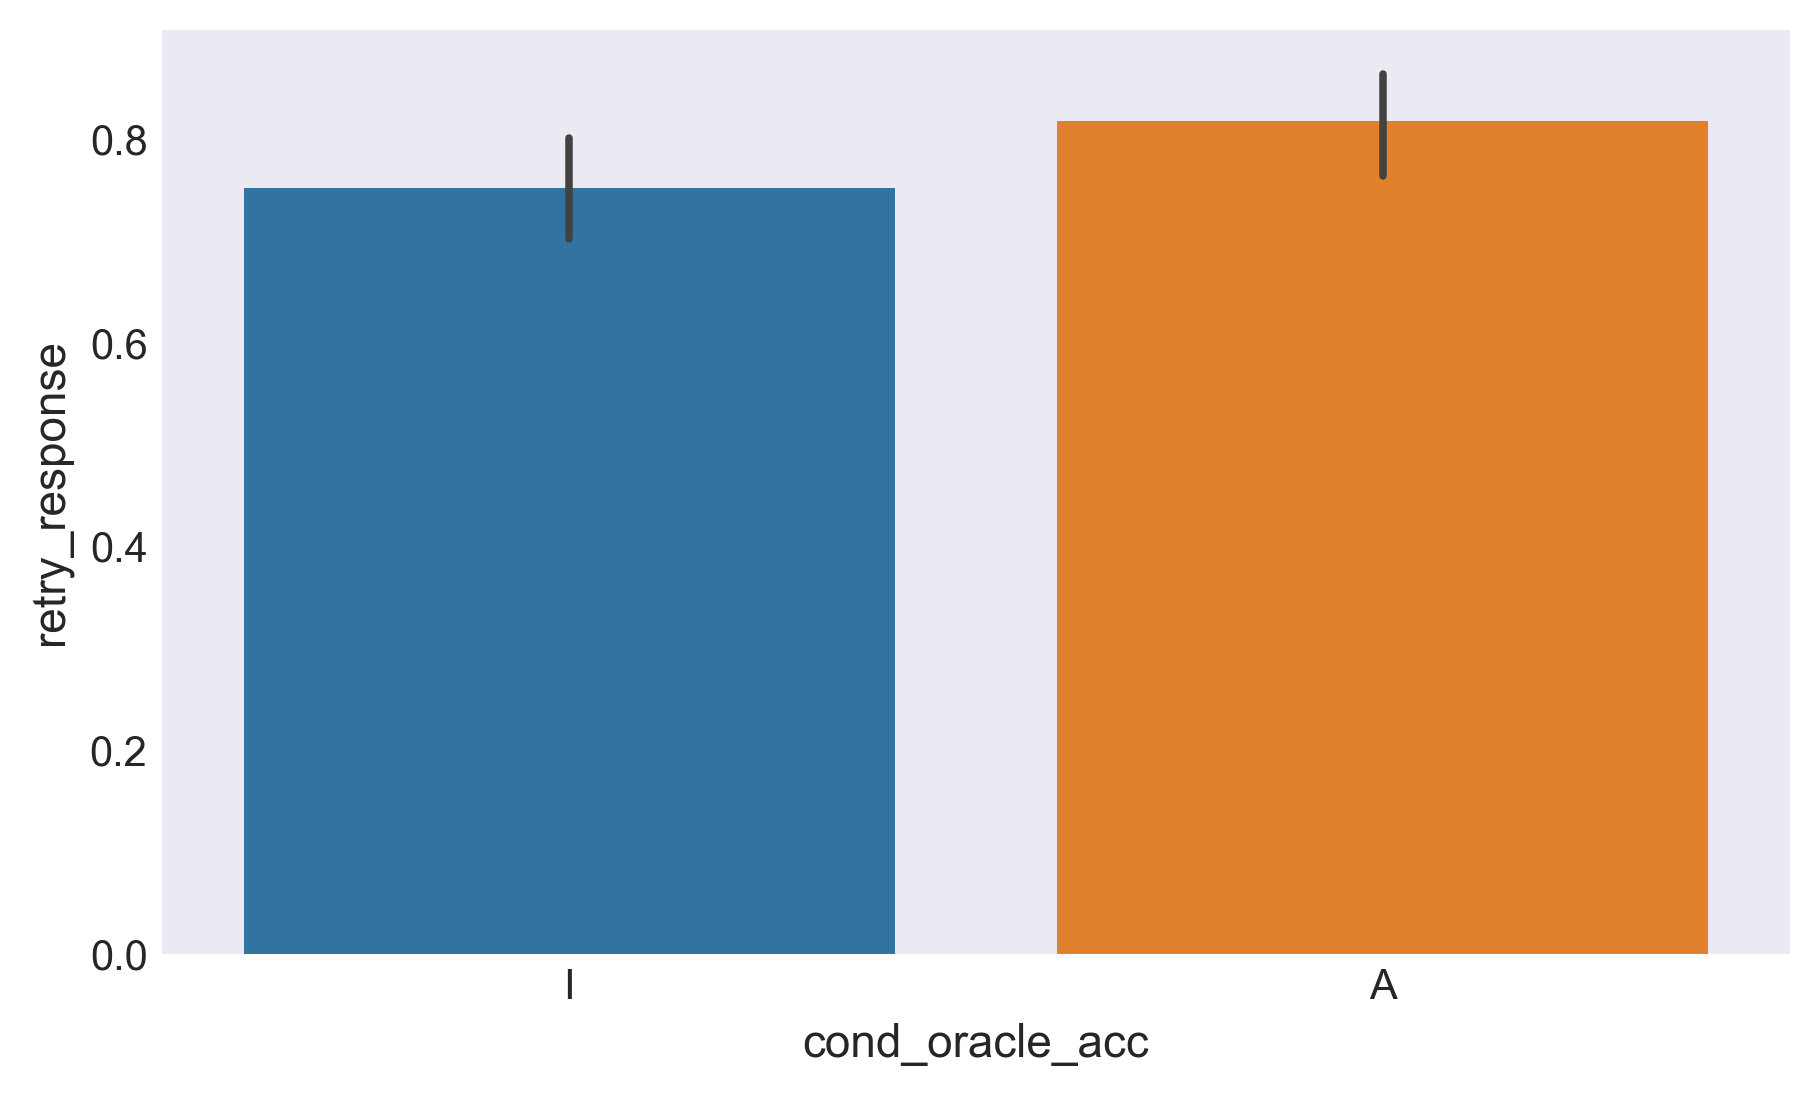

In [13]:
df_responded = df[df.retry_response > -1]
sns.barplot(data=df_responded, x='cond_oracle_acc', y='retry_response')